<a href="https://colab.research.google.com/github/Stella-kimani/R_Programming_Supervised-and-Unsupervised_Learning-/blob/master/Stella_k_Advertising_dataset_analysis_R_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.1. Business Understanding

The aim of this analysis is to identify individuals that are most likely to click on advertisements for an online cryptography course on a Kenyan entrepreneur’s blog.



#1.2 Metrics for Success
The analysis will be successful when  we are able to build models with an accuracy of  atleast 90%.
Hence we will be successful target audience for her advertisements have been identified.

#1.3.Understanding the context

Targeted advertising is a form of online advertising that uses information collected on the specific traits, interests, and preferences of a consumer to select which ads to place on a website. Irrelevant online adver- tisements for unwanted products or services can lead to brand erosion and loss of advertising revenue as customers are more likely to block all ads if they feel that they are intruding on their browsing experience

Cryptography is associated with the process of converting ordinary plain text into unintelligible text and vice-versa. It is a method of storing and transmitting data in a particular form so that only those for whom it is intended can read and process it. Cryptography not only protects data from theft or alteration, but can also be used for user authentication. Earlier cryptography was effectively synonymous with encryption but nowadays cryptography is mainly based on mathematical theory and computer science practice.
Online ads have become a daily part of internet life.Online advertising is much more fluid and dynamic than simple print ads. Online ads can and should be precise in who they target, going only to viewers based on location, age, interests, or other demographics relevant to the business. The ‘click’ goes to the business’s homepage or a content-specific landing page.

Types of Online Ads:

1.Google Adwords - These ads appear on Google search result pages, on the side, for businesses pertaining to the search criteria and for the demographic parameters. These usually are effective for campaigns based on specific keywords.

2.Search Ads - These are similar to Google Adwords, except these ads appear as search results (usually top results) instead of on the side.

#1.4 Experimental Design

The following are the steps that we will take to conduct this project. They are listed below:

1.Problem definition

2.Data sourcing

3.Loading and checking the  data

4.Perform necessary data preparation and data cleaning

5.Perform Exploratory Data Analysis (Univariate, Bivariate)

6.Implement the Solution

7.Challenge the Solution

8.Conclusion

9.Follow up Questions


#2.Data sourcing.
The data is from so it is relevant and the source is reliable and can be found here has been validated can be downloaded from 
Kaggle. https://www.kaggle.com/homelesssandwich/analysis-of-advertising-data

#3.Reading the data and importing required libraries

In [8]:
#Installing necesary  package 

install.packages("data.table")#This package provides an enhanced version of a data frame which are structures for storing data in base R.
require(data.table)
library(data.table)

In [ ]:
install.packages("devtools")
devtools::install_github("tidyverse/reprex")

In [10]:
#Loading dataset 
df <- fread('http://bit.ly/IPAdvertisingData')

In [4]:
#Preview of the head of our dataset

print(head(df))


   Daily Time Spent on Site Age Area Income Daily Internet Usage
1:                    68.95  35    61833.90               256.09
2:                    80.23  31    68441.85               193.77
3:                    69.47  26    59785.94               236.50
4:                    74.15  29    54806.18               245.89
5:                    68.37  35    73889.99               225.58
6:                    59.99  23    59761.56               226.74
                           Ad Topic Line           City Male    Country
1:    Cloned 5thgeneration orchestration    Wrightburgh    0    Tunisia
2:    Monitored national standardization      West Jodi    1      Nauru
3:      Organic bottom-line service-desk       Davidton    0 San Marino
4: Triple-buffered reciprocal time-frame West Terrifurt    1      Italy
5:         Robust logistical utilization   South Manuel    0    Iceland
6:       Sharable client-driven software      Jamieberg    1     Norway
             Timestamp Clicked on Ad
1: 2

In [5]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
#Let's display the structure of the dataset.

str(df)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  10 variables:
 $ Daily Time Spent on Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily Internet Usage    : num  256 194 236 246 226 ...
 $ Ad Topic Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : chr  "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42" "2016-01-10 02:31:19" ...
 $ Clicked on Ad           : int  0 0 0 0 0 0 0 1 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


This is internal structure of the dataset.There are 1000 rows and 10 columns.The columns age, daily time spent on site,male, area income ,clicked on ad are all numerical columns. Ad topic line ,city,country ,timestamp are factors(character types).

In [16]:
#Let's get the dimension of our dataset

dim(df)

[1] 1000   10

The dataset has 1000 rows and 10 columns.

In [7]:
#Getting the class of the dataframe

class(df)

[1] "data.table" "data.frame"

In [17]:
#Summary of the advertising dataset

summary(df)

 Daily Time Spent on Site      Age         Area Income    Daily Internet Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Ad Topic Line          City                Male         Country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

This produces result and stastical summaries of all the variables.The minumum time spent on the site is 32 minutes and the maximum time is 91 minutes.The mean time spent on the site is 65 minutes.The youngest person who visited the site is 19 years old and the oldest person is 61 years old.Majority of the people who visited the site were 36 years old.

In [8]:
#Columns of the advertising dataset

names(df)

[1] "Daily Time Spent on Site" "Age"                     
 [3] "Area Income"              "Daily Internet Usage"    
 [5] "Ad Topic Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked on Ad"

##3.1Dataset External validation

This dataset is valid and can be found here.

https://www.kaggle.com/homelesssandwich/analysis-of-advertising-data

This is a descriprion of the columns.

1.Daily Time Spent on a Site -Time spent by the user on a site in minutes.

2.Age- Customer's age in terms of years.

3.Area Income- Average income of geographical area of consumer.

4.Daily Internet Usage -Average minutes in a day consumer is on the internet.

5.Ad Topic Line- Headline of the advertisement.

6.City -City of the consumer.

7.Male -Whether or not a consumer was male.

8.Country- Country of the consumer.

9.Timestamp -Time at which user clicked on an Ad or the closed window.

10.Clicked on Ad 0 or 1 is indicated clicking on an Ad.

#4.Data preparation and cleaning





In [18]:
#Check for duplicates

duplicated_df <- df[duplicated(df),]
print(duplicated_df)


Empty data.table (0 rows and 10 cols): Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City...


There are no duplicates in the dataset

In [9]:
#checking for unique values in the variables
lapply(df, function (x) {length(unique(x))})

$`Daily Time Spent on Site`
[1] 900

$Age
[1] 43

$`Area Income`
[1] 1000

$`Daily Internet Usage`
[1] 966

$`Ad Topic Line`
[1] 1000

$City
[1] 969

$Male
[1] 2

$Country
[1] 237

$Timestamp
[1] 997

$`Clicked on Ad`
[1] 2

In [11]:
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [7]:
#converting timestamp to datetimefor better analysis

df$Timestamp = df$`Timestamp`
head(df$`Timestamp`)

[1] "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42"
[4] "2016-01-10 02:31:19" "2016-06-03 03:36:18" "2016-05-19 14:30:17"

In [8]:
df$month <- format(as.POSIXct(strptime(df$Timestamp,"%Y-%m-%d %H:%M:%S",tz="")), format = "%m")
head(df$month)
 

[1] "03" "04" "03" "01" "06" "05"

In [9]:
df$year <- format(as.POSIXct(strptime(df$Timestamp,"%Y-%m-%d %H:%M:%S",tz="")), format = "%Y")
head(df$year)

[1] "2016" "2016" "2016" "2016" "2016" "2016"

In [11]:
df$hour <- format(as.POSIXct(strptime(df$Timestamp,"%Y-%m-%d %H:%M:%S",tz="")), format = "%H")
head(df$hour)

[1] "00" "01" "20" "02" "03" "14"

In [12]:
df$min <- format(as.POSIXct(strptime(df$Timestamp,"%Y-%m-%d %H:%M:%S",tz="")) ,format = "%M")
head(df$min)

[1] "53" "39" "35" "31" "36" "30"

In [13]:
df$sec <- format(as.POSIXct(strptime(df$Timestamp,"%Y-%m-%d %H:%M:%S",tz="")) ,format = "%S")
head(df$sec)

[1] "11" "02" "42" "19" "18" "17"

In [16]:
paste(head(df$year), head(df$month), head(df$day), head(df$hour), head(df$min), head(df$sec))

[1] "2016 03 27 00 53 11" "2016 04 04 01 39 02" "2016 03 13 20 35 42"
[4] "2016 01 10 02 31 19" "2016 06 03 03 36 18" "2016 05 19 14 30 17"

In [14]:
names(df)

[1] "Daily Time Spent on Site" "Age"                     
 [3] "Area Income"              "Daily Internet Usage"    
 [5] "Ad Topic Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked on Ad"           
[11] "month"                    "year"                    
[13] "hour"                     "min"                     
[15] "sec"

In [15]:
df <- select(df, -Timestamp) 
names(df)

[1] "Daily Time Spent on Site" "Age"                     
 [3] "Area Income"              "Daily Internet Usage"    
 [5] "Ad Topic Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Clicked on Ad"            "month"                   
[11] "year"                     "hour"                    
[13] "min"                      "sec"

In [16]:
null_df <- is.null(df)
null_df

[1] FALSE

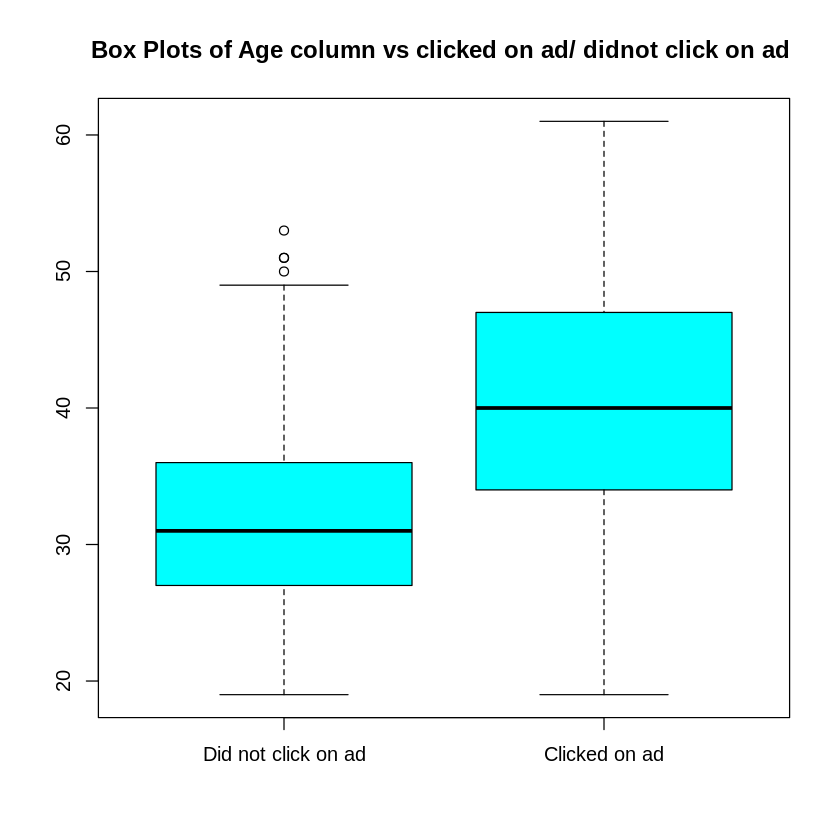

In [ ]:
#Plot Box Plots to find outliers

Age_0 <- df$Age[df$`Clicked on Ad`==0]
Age_1 <- df$Age[df$`Clicked on Ad`==1]
boxplot(Age_0, Age_1,names=c("Did not click on ad","Clicked on ad"),
        col="cyan")
title("Box Plots of Age column vs clicked on ad/ didnot click on ad ")


From the plot the outliers are the data points located outside the whiskers of the box plot in the did not click on ad plot who are people aged 50, 51,53 years. However since we are predicting whether an individual clicked on an ad or not,i will not remove these outliers.

In [ ]:
# print out the outlier

boxplot.stats(Age_0)$out

[1] 53 51 51 50

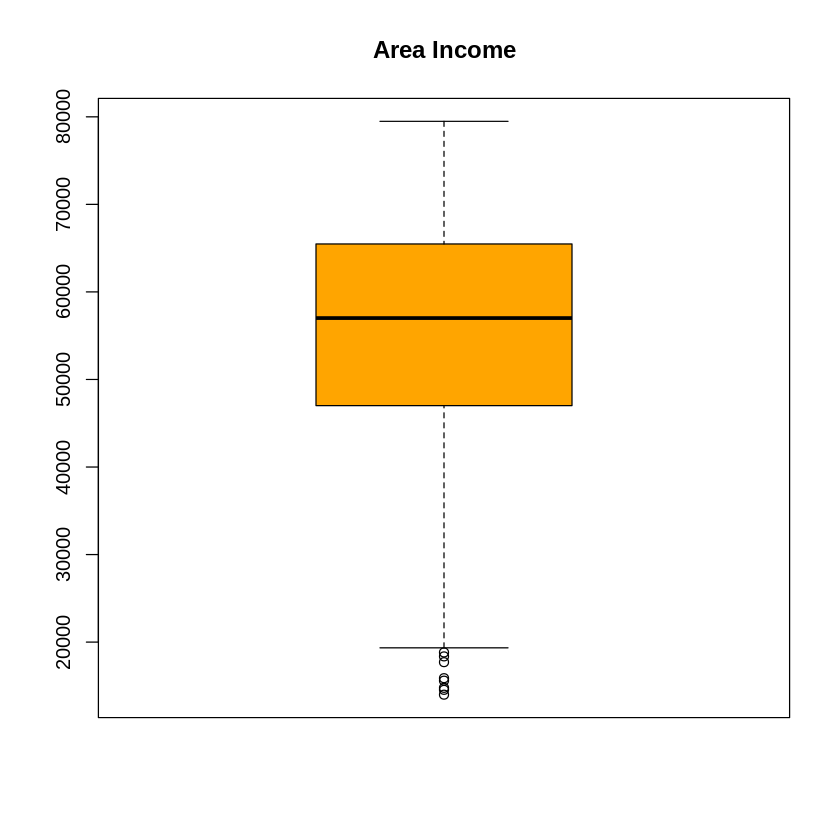

In [ ]:
#Checking for outliers in the area income column

boxplot(df$`Area Income`, main= "Area Income", bowex=0.2, col= "orange")

There are outliers in this column which are values below 20,000

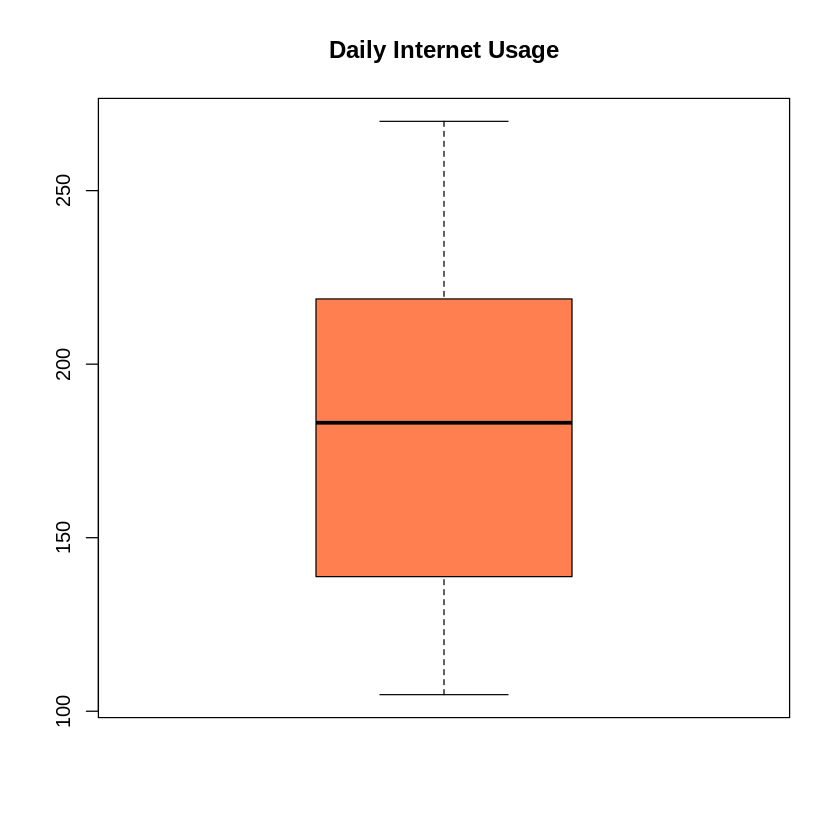

In [ ]:
#Check for outliers in the daily internet usage column

boxplot(df$`Daily Internet Usage`, main= "Daily Internet Usage", bowex=0.2, col= "coral")

There are no outliers in this column.

#5.Exploratory data analysis (EDA)

##Univariate Analysis

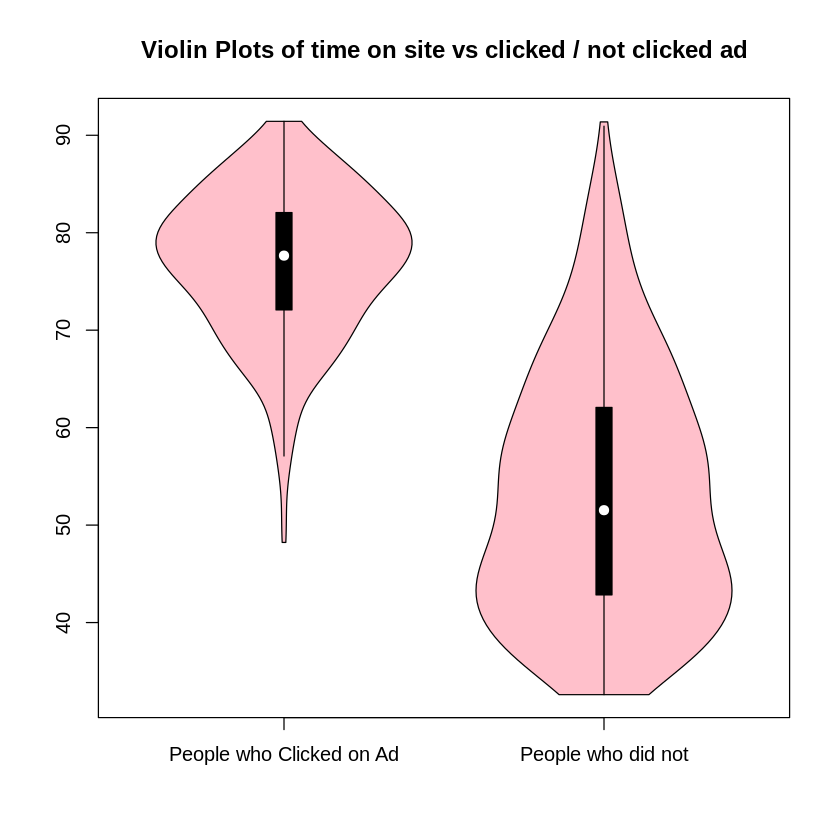

In [ ]:
#Violin plot

time_1 <- df$`Daily Time Spent on Site`[df$`Clicked on Ad`==1]
time_0 <- df$`Daily Time Spent on Site`[df$`Clicked on Ad`==0]
vioplot(time_0, time_1,names=c("People who Clicked on Ad", "People who did not"),
        col="pink")
title("Violin Plots of time on site vs clicked / not clicked ad")


From the violin plot we see there is a difference in the shape of the plot for clicked on Ad and plot for didnot click on Ad. It also seems that the didnot click on Ad plot has more values than the clicked on Ad plot.Wider sections of the violin plot usually represents a higher probability of observations taking values.

Warning message in plot.window(xlim, ylim, log = log, ...):
“"legends" is not a graphical parameter”
Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
“"legends" is not a graphical parameter”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“"legends" is not a graphical parameter”
Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
“"legends" is not a graphical parameter”


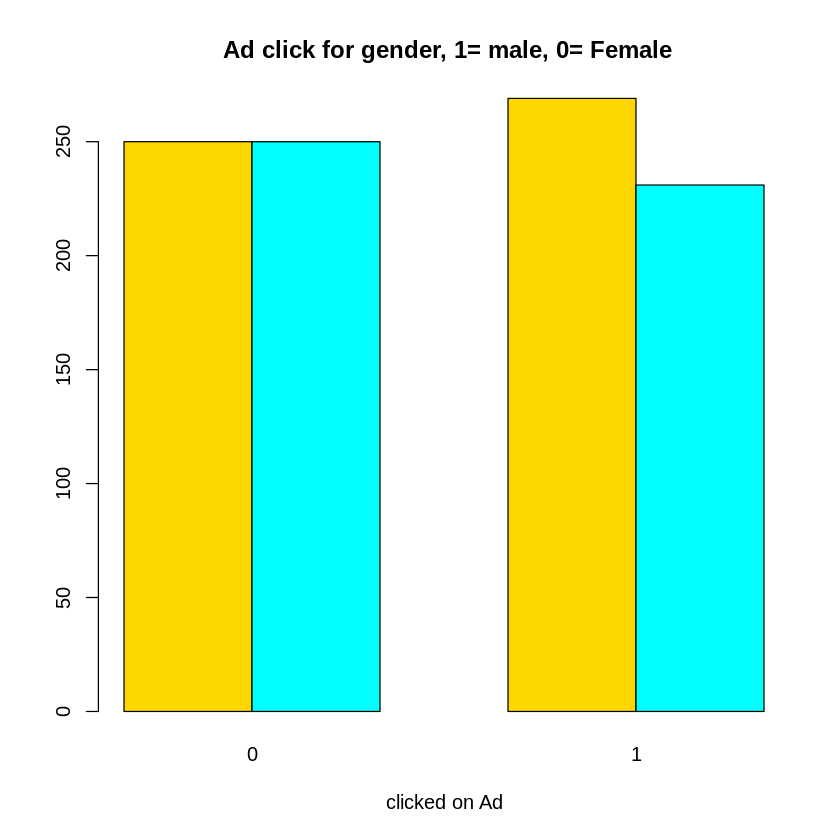

In [ ]:
#Plotting a barplot.

Ads_clicked_on = table(df$Male,df$`Clicked on Ad`)
barplot(Ads_clicked_on,main=" Ad click for gender, 1= male, 0= Female",xlab="clicked on Ad",col=c("gold","cyan"),beside=TRUE, legends=TRUE)



The count for male who clicked on ads is higher than the count for females who clicked on the ads.

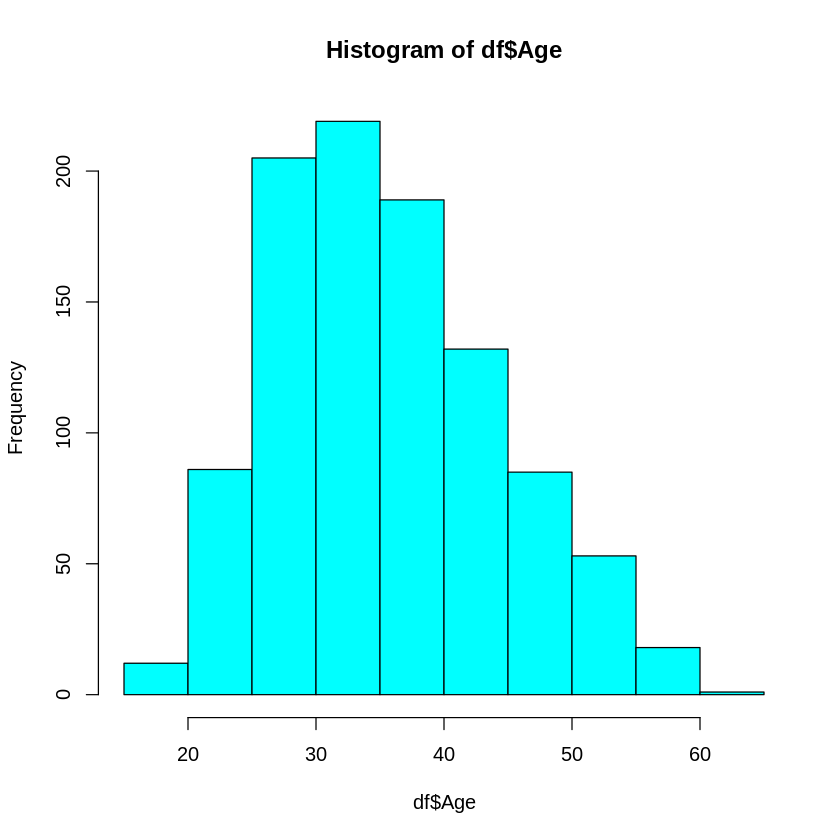

In [ ]:
#Plot a histogram of the age column.

hist(df$`Age`,col="cyan")

From this histogram it shows that majority of the people were between 30 - 40 years old.The minum age in this study is below 20. It is a positively skewed plot since age cannot be negative.

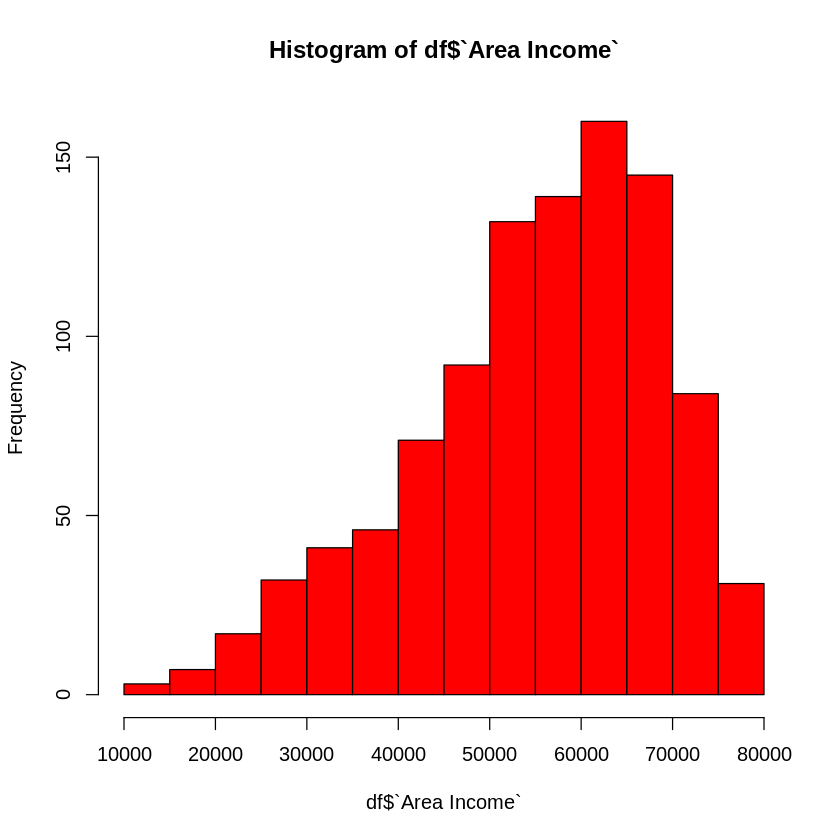

In [12]:
#Plot a histogram of the Area Income column.

hist(df$`Area Income`,col="red")

From the plot above the highest income is between 60,000 to 70,000.This is the highest count for average income of geographical area of consumer. The plot is negatively skewed.

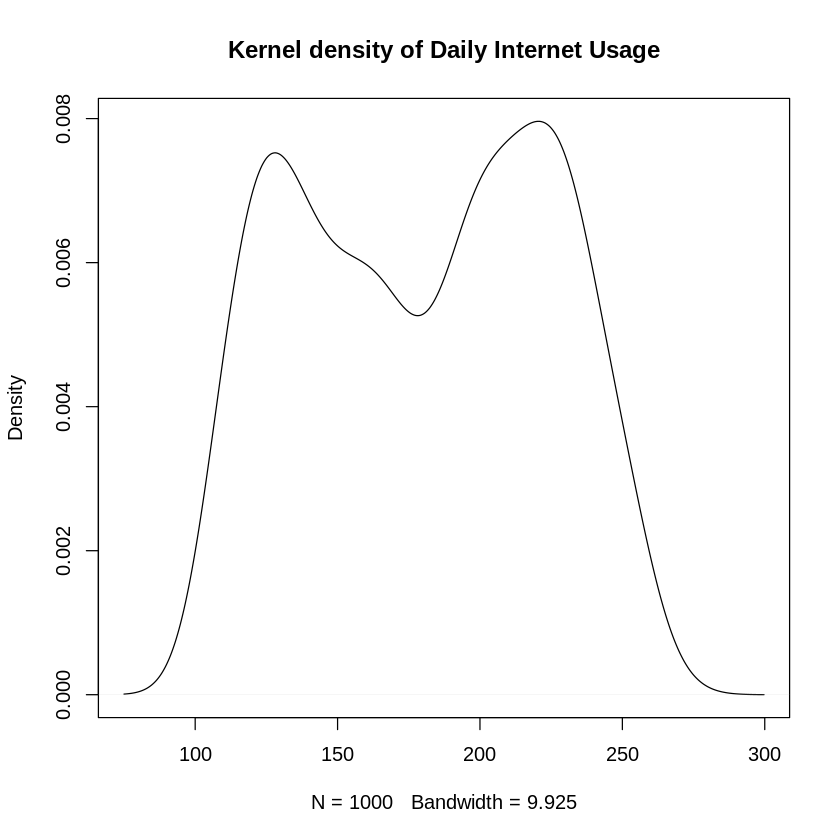

In [ ]:
plot(density(df$`Daily Internet Usage`), main = "Kernel density of Daily Internet Usage")

The daily internet usage density plot shows that is bimodal and that the highest average minutes in a day consumer is on the internet are between 200- 250 minutes and 115 to 150 minutes.

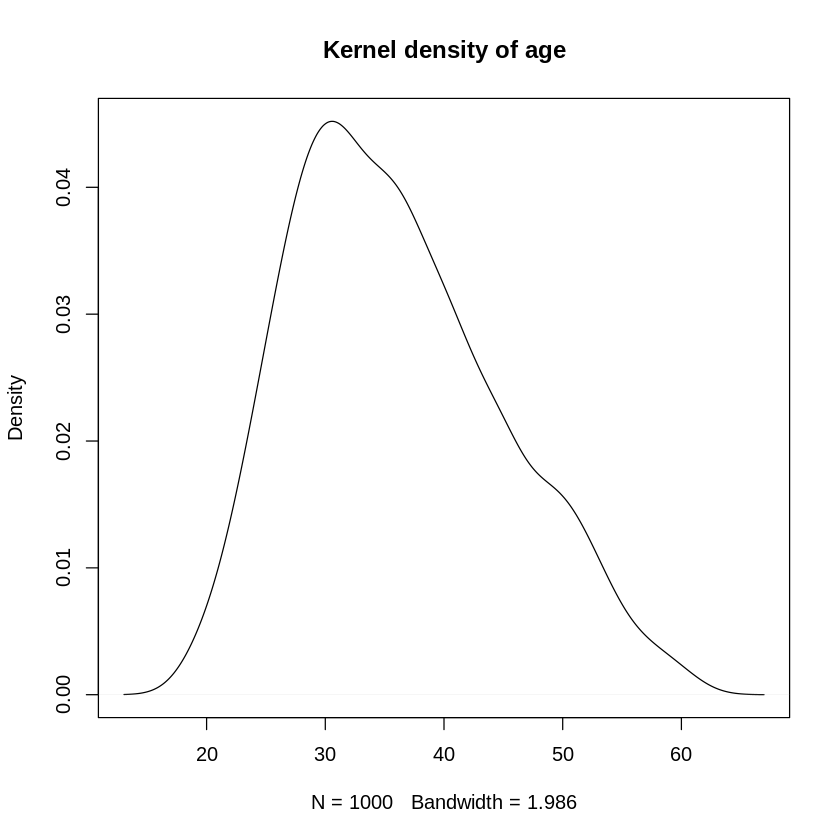

In [ ]:
plot(density(df$Age), main = "Kernel density of age")

Majority of the people in this dataset were between 30 - 40 years.A few people were more than 60 years old.

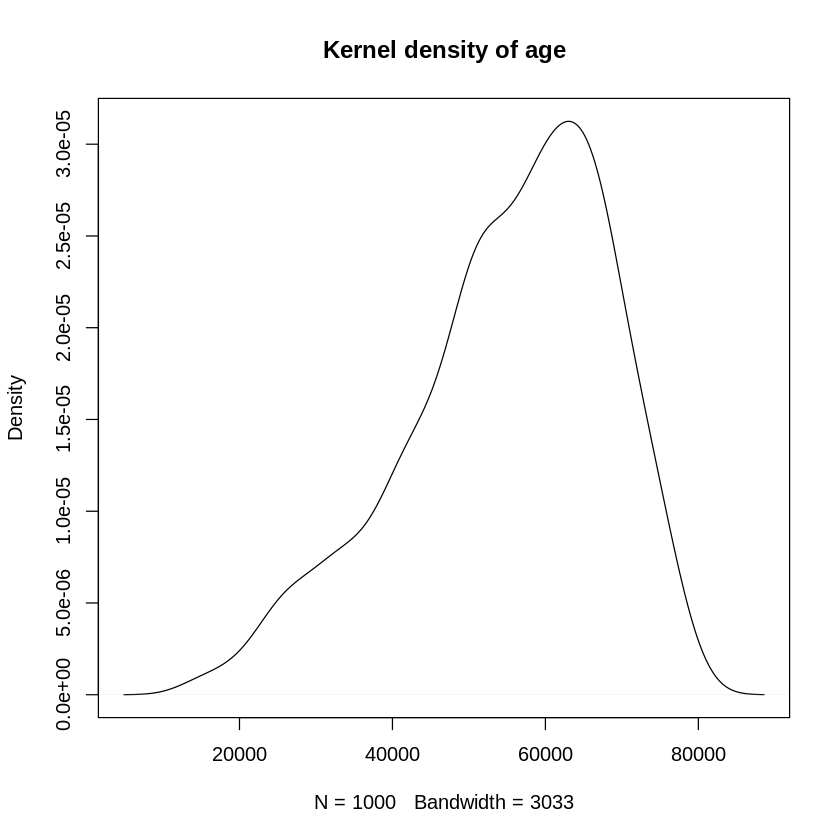

In [ ]:
#Plot a density bar of Area income.
library(ggplot2)
plot(density(df$`Area Income`), main = "Kernel density of area income")

From the plot above the Average income of geographical area of consumer is highest at a value of between 60,000 to 70,000.



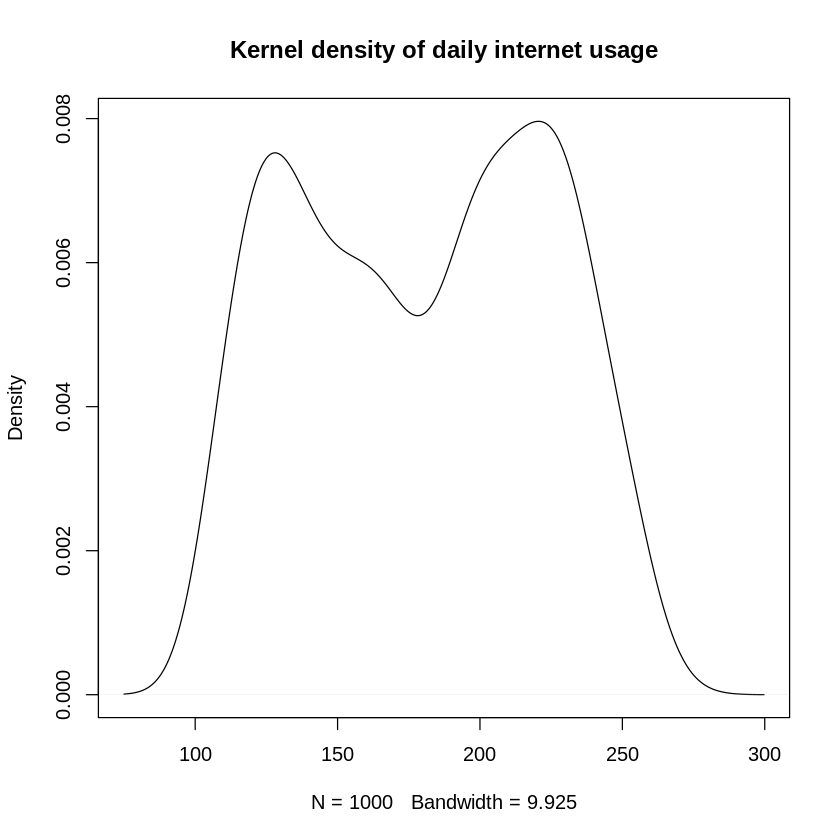

In [ ]:
plot(density(df$`Daily Internet Usage`), main = "Kernel density of daily internet usage")

The daily internet usage density plot shows that is bimodal and that the highest average minutes in a day consumer is on the internet are between 200- 250 minutes and 115 to 150 minutes.

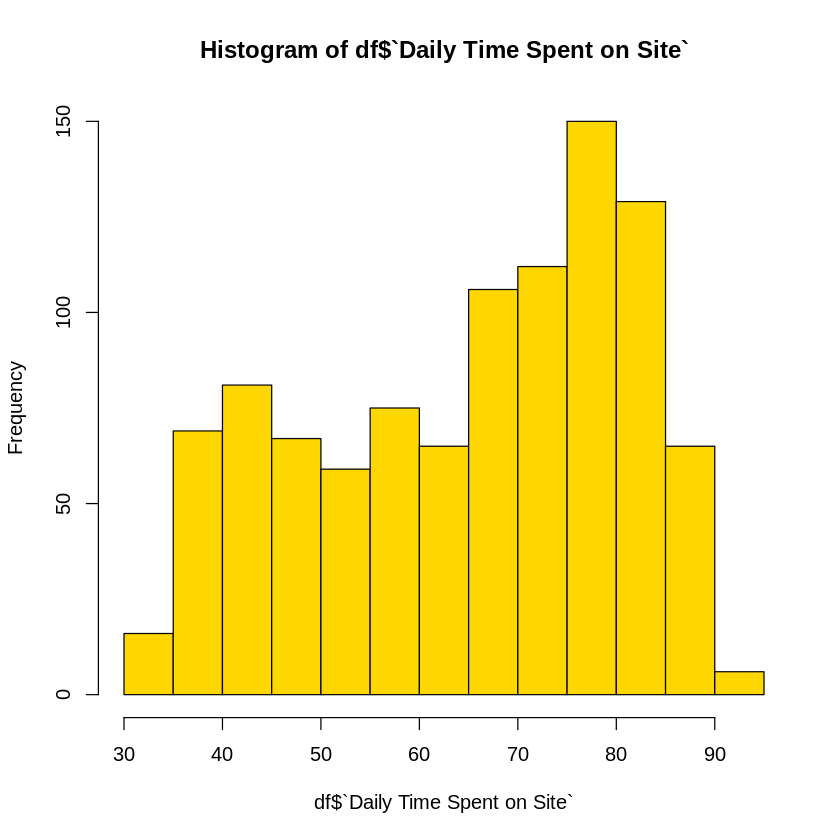

In [ ]:
#Plotting a histogram of daily time spent on site.

hist(df$`Daily Time Spent on Site`,col="gold")

The plot shows that the highest time spent on the online cryptography course site ranged from 75 minutes to 80 minutes.

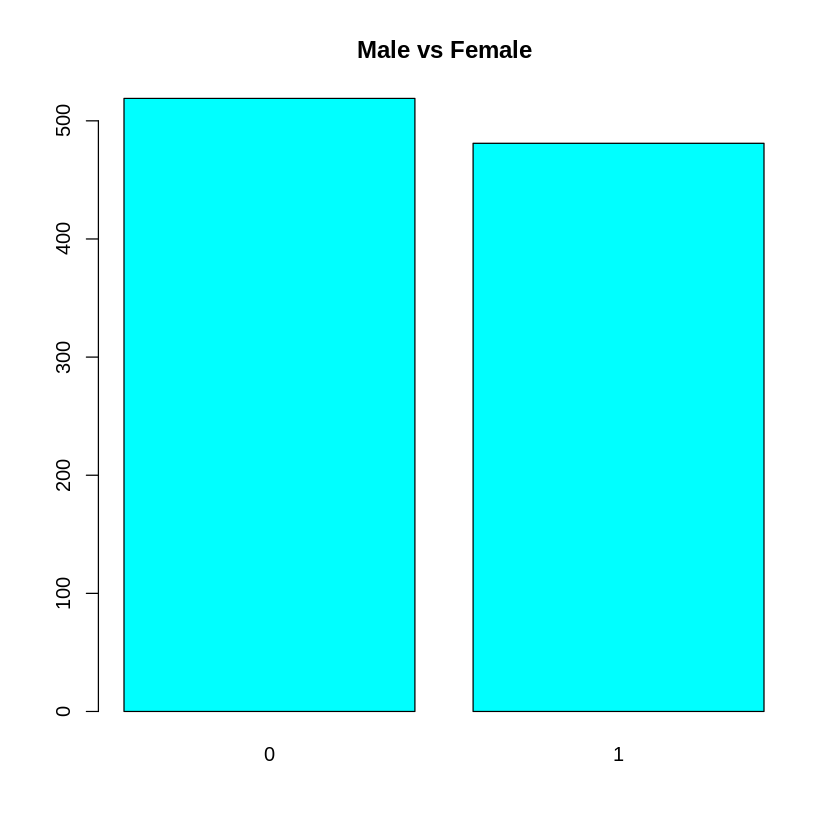

In [ ]:
# Bar plot for male column.

sex <- df$Male
sex_f <- table(sex)
barplot(sex_f, col = "cyan")
title("Male vs Female")

The female count represented by 0 is higher than male count which is represented by 1.This means that there is a higher number of females compared to male in the study

In [20]:
install.packages("plyr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



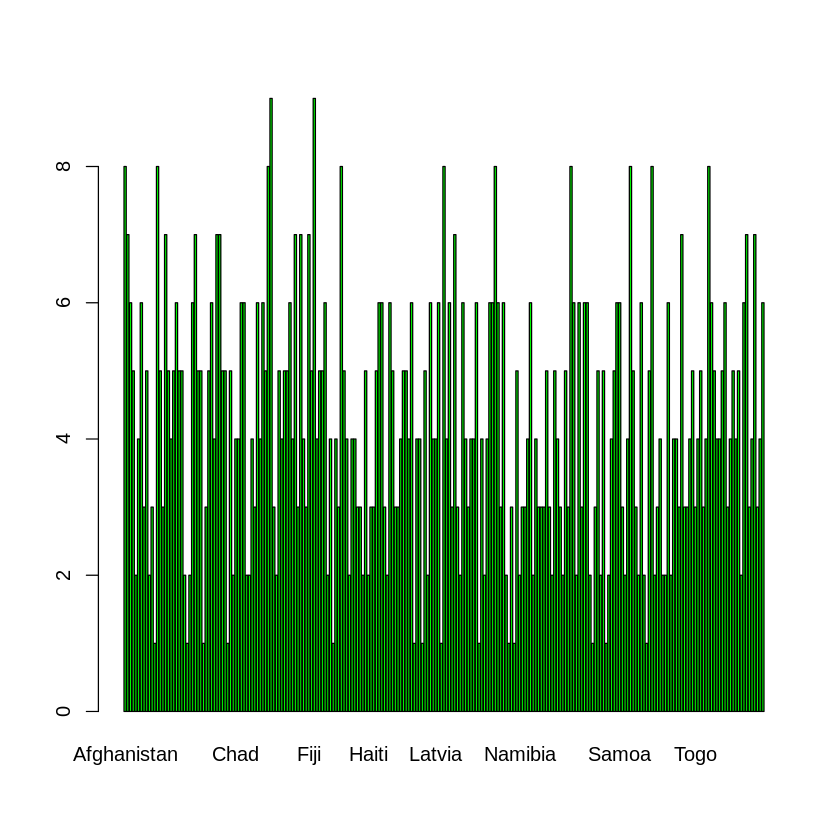

In [31]:
#country_count_freq <- table(df$Country) 
barplot(country_count_freq, col = "green")

The count for this plot represents visitors

##4.1Daily time spent on site

In [22]:
getmode <- function(v) {
    uniqv <- unique(v) 
    uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [15]:
# Mode 
# ---
# 
install.packages("e1071")
library(e1071)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Mode for daily time spent on site column

Time_mode <- getmode(df$`Daily Time Spent on Site`)
print(Time_mode)

[1] 62.26


In [ ]:
# Variance 
# ---

paste("variance:", var(df$`Daily Time Spent on Site`))

[1] "variance: 251.337094854855"

In [ ]:
# Standard Deviation
# ---
# 
paste("std dev:", sd(df$`Daily Time Spent on Site`))

[1] "std dev: 15.8536145675002"

In [ ]:
# Kurtosis
# ---
# 
paste("kurtosis:", kurtosis(df$`Daily Time Spent on Site`))

[1] "kurtosis: -1.09986382635506"

In [ ]:
# Skewness
# ---
# 
paste("skewness:", skewness(df$`Daily Time Spent on Site`))

[1] "skewness: -0.370645950169329"

##4.2Age

In [ ]:
paste("mode:", getmode(df$Age))

[1] "mode: 31"

In [ ]:
paste("variance:", var(df$Age))

[1] "variance: 77.1861051051051"

In [ ]:
paste("std dev:", sd(df$Age))

[1] "std dev: 8.78556231012592"

In [ ]:
paste("kurtosis:", kurtosis(df$Age))

[1] "kurtosis: -0.409706599977131"

In [169]:
paste("range:", range(df$Age))

[1] "range: 0" "range: 1"

##4.3Area Income

In [ ]:
paste("mode:", getmode(df$`Area Income`))

[1] "mode: 61833.9"

In [ ]:
paste("variance:", var(df$`Area Income`))

[1] "variance: 179952405.951775"

In [ ]:
paste("std dev:", sd(df$`Area Income`))

[1] "std dev: 13414.6340222824"

In [16]:
paste("kurtosis:", kurtosis(df$`Area Income`))

[1] "kurtosis: -0.111092431809917"

In [17]:
paste("skewness:", skewness(df$`Area Income`))

[1] "skewness: -0.648422850205901"

In [18]:
paste("range:", range(df$`Area Income`))

[1] "range: 13996.5" "range: 79484.8"

##4.4Daily Internet usage

In [23]:
paste("mode:", getmode(df$`Daily Internet Usage`))

[1] "mode: 167.22"

In [20]:
paste("variance:", var(df$`Daily Internet Usage`))

[1] "variance: 1927.41539618619"

In [24]:
paste("std dev:", sd(df$`Daily Internet Usage`))

[1] "std dev: 43.9023393019801"

In [25]:
paste("kurtosis:", kurtosis(df$`Daily Internet Usage`))

[1] "kurtosis: -1.27575249371253"

In [27]:
paste("skewness:", skewness(df$`Daily Internet Usage`))

[1] "skewness: -0.0334368136557063"

In [17]:
# changing column names

names(df)[1] <- "Daily_time_spent_on_site"
names(df)[3] <- "Area_income"
names(df)[4] <- "Daily_internet_usage"
names(df)[5] <- "Ad_topic_line"
names(df)[10] <- "Clicked_on_ad"

In [18]:
install.packages("rpart")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [19]:
install.packages("mlbench")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’




In [21]:
install.packages("lattice")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Bi-variate analysis

##4.5.Correlation



In [22]:

x <- round(cor(select_if(df, is.numeric)), 2)
res <- cor(x)
corr <- round(res,2)
print(corr)

                         Daily_time_spent_on_site   Age Area_income
Daily_time_spent_on_site                     1.00 -0.80        0.69
Age                                         -0.80  1.00       -0.67
Area_income                                  0.69 -0.67        1.00
Daily_internet_usage                         0.88 -0.83        0.71
Male                                        -0.08 -0.14       -0.12
Clicked on Ad                               -0.95  0.85       -0.79
                         Daily_internet_usage  Male Clicked on Ad
Daily_time_spent_on_site                 0.88 -0.08         -0.95
Age                                     -0.83 -0.14          0.85
Area_income                              0.71 -0.12         -0.79
Daily_internet_usage                     1.00 -0.02         -0.97
Male                                    -0.02  1.00         -0.01
Clicked on Ad                           -0.97 -0.01          1.00


The correlation between the variables and themselves is 1 as seen in the correlation summary.There is a strong positive relationship between Daily Time Spent on Site and the Daily Internet Usage, as the correlation between the 2 variables is 0.88 meaning the more time spent on site the more likely it is one will use more internet on a daily basis. There is a strong negative relationship between Daily Time Spent on Site and the Clicked on Ad column as shown by a correlation of -0.95

In [23]:
 #using hierarchical clustering
install.packages('corrplot')
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



,Daily_time_spent_on_site,Age,Area_income,Daily_internet_usage,Male,Clicked on Ad
Daily_time_spent_on_site,1.00000000,-0.33151334,0.310954413,0.51865848,-0.018950855,-0.74811656
Age,-0.33151334,1.00000000,-0.182604955,-0.36720856,-0.021044064,0.49253127
Area_income,0.31095441,-0.18260496,1.000000000,0.33749553,0.001322359,-0.47625463
Daily_internet_usage,0.51865848,-0.36720856,0.337495533,1.00000000,0.028012326,-0.78653918
Male,-0.01895085,-0.02104406,0.001322359,0.02801233,1.000000000,-0.03802747
Clicked on Ad,-0.74811656,0.49253127,-0.476254628,-0.78653918,-0.038027466,1.00000000


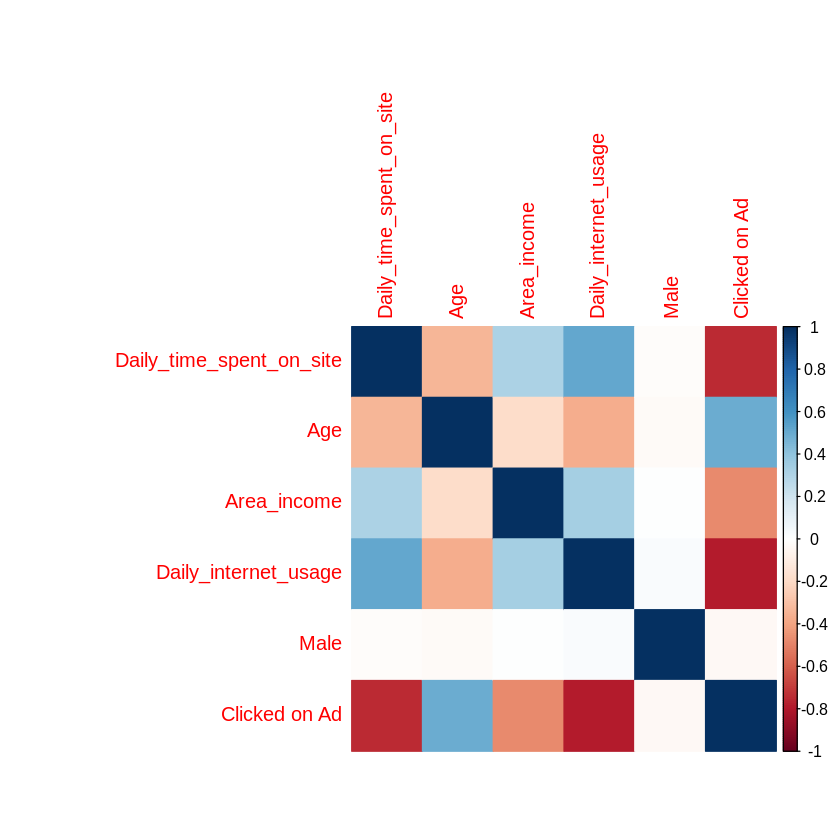

In [24]:
# correlation matrix visualization
num_cols <- Filter(is.numeric, df) 
cor(num_cols)

corrplot(cor(num_cols), method = "color")

##4.6.Covariance

In [63]:
#Finding the covariance between the DailyTime Spent on Site and Daily Internet Usage

time_ad_c <- df$`Daily Time Spent on Site`
net_usage_c <- df$`Daily Internet Usage`
cov(time_ad_c,net_usage_c)

[1] 360.9919

In [64]:
#Covariance between the Age column and Clicked on Ad column.

Age_cov_c <- df$Age
Ad_cov_c <- df$`Clicked on Ad`
cov(Age_cov_c,Ad_cov_c)

[1] 2.164665

In [65]:
#Covariance between the Area Income and Clicked on Ad column.

Area_cov_c <- df$`Area Income`
Ad_cov_c <- df$`Clicked on Ad`
cov(Area_cov_c,Ad_cov_c)

[1] -3195.989

This is a negative covariance and shows that the Area Income column and the Clicked on Ad column are inversely related.

##4.7.Scatter plots

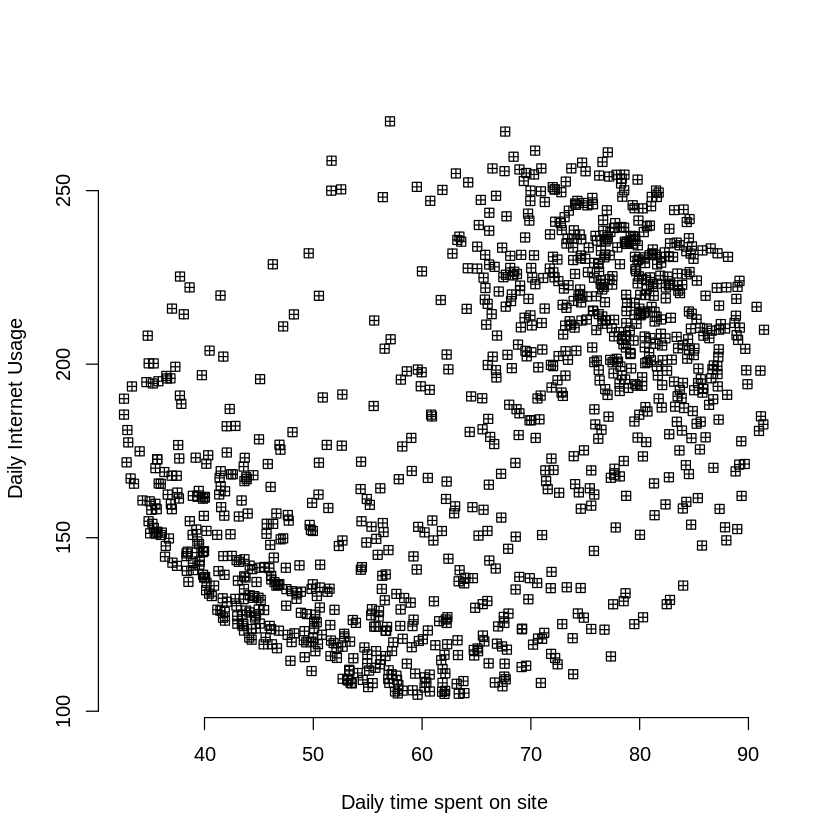

In [66]:
#Scatter plot between the Daily time spent on site and Daily Internet Usage

plot(time_ad_c,net_usage_c, xlab="Daily time spent on site",
     ylab="Daily Internet Usage", pch = 12, frame= FALSE)

From the scatter plot, it shows that the 2 variables are very highly correlated as shown by the data points pattern.It shows that one variable is related to the other.

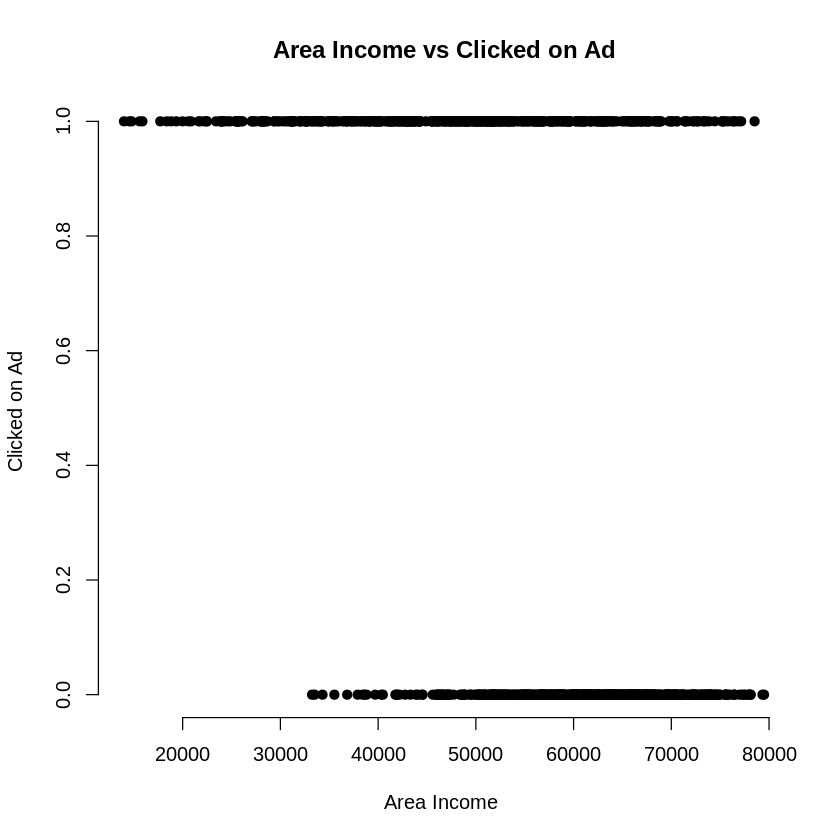

In [77]:
plot(df$`Area Income`, df$`Clicked on Ad`, main="Area Income vs Clicked on Ad", 
     xlab="Area Income ", ylab="Clicked on Ad ", pch=19, frame= FALSE)

From the plot it shows that the two variables are not highly correlated.

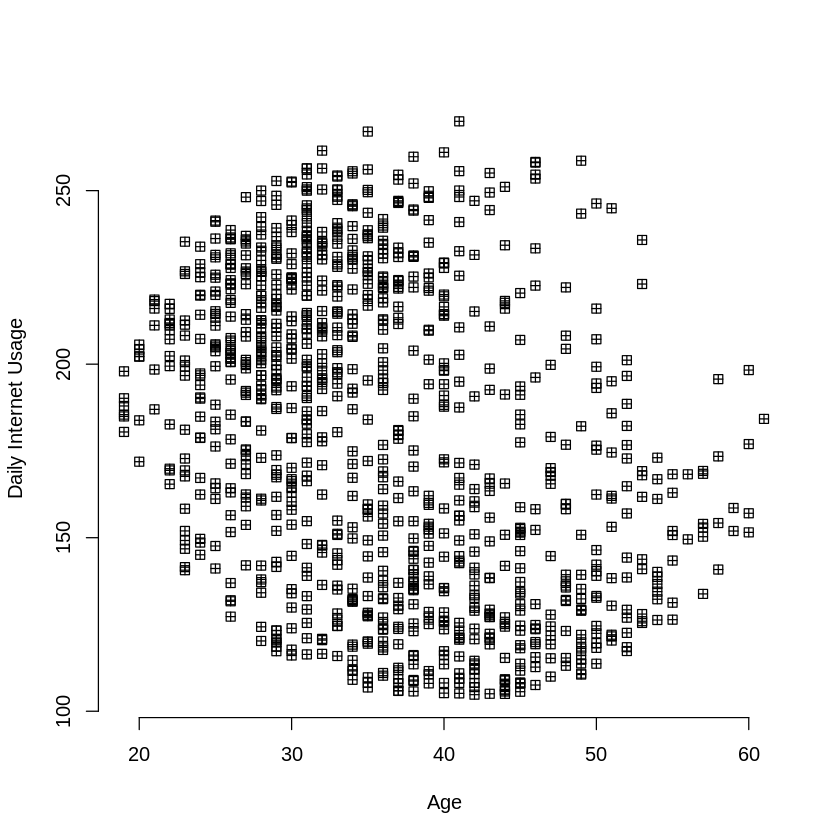

In [78]:
#Scatter plot of age column and daily internet usage.

plot(Age_cov_c,net_usage_c, xlab="Age",
     ylab="Daily Internet Usage",pch = 12, frame= FALSE)

The most active age for people who use more minutes in the online are aged between 30 and 40.There is a high correlation between these 2  variables.

##4.8.Bar plots

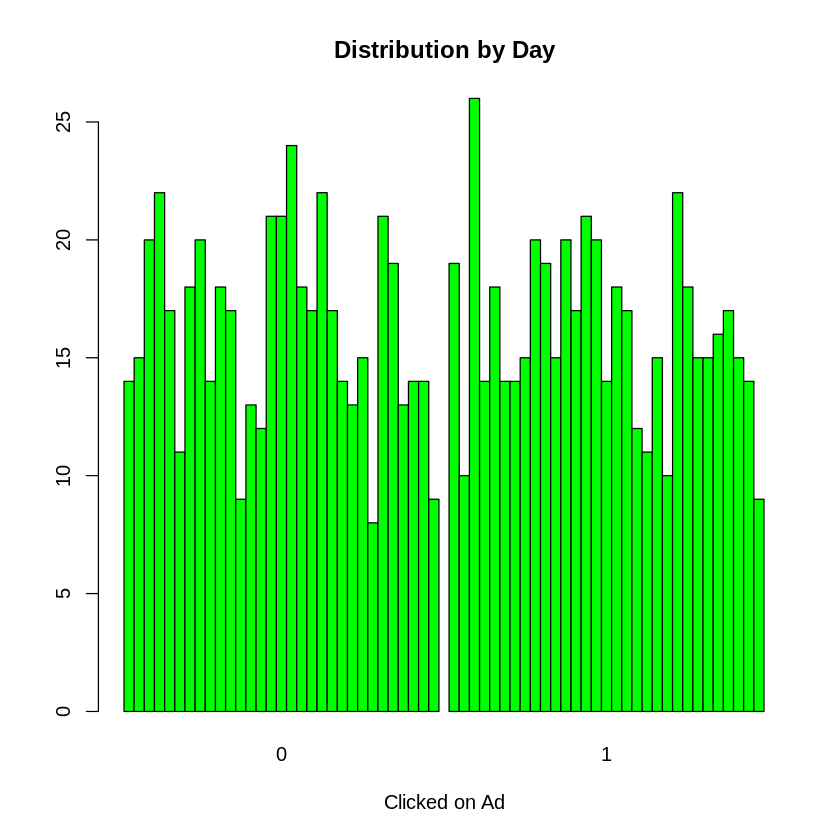

In [68]:
#Plot of day vs clicked on ad column
day <- table(df$day, df$`Clicked on Ad`) 
barplot(day, main="Distribution by Day",
    xlab="Clicked on Ad",
    beside=TRUE, col= 'green')

The plot for days clicked on ad vs not clicked on ad are somehow similar in terms of the frequency.

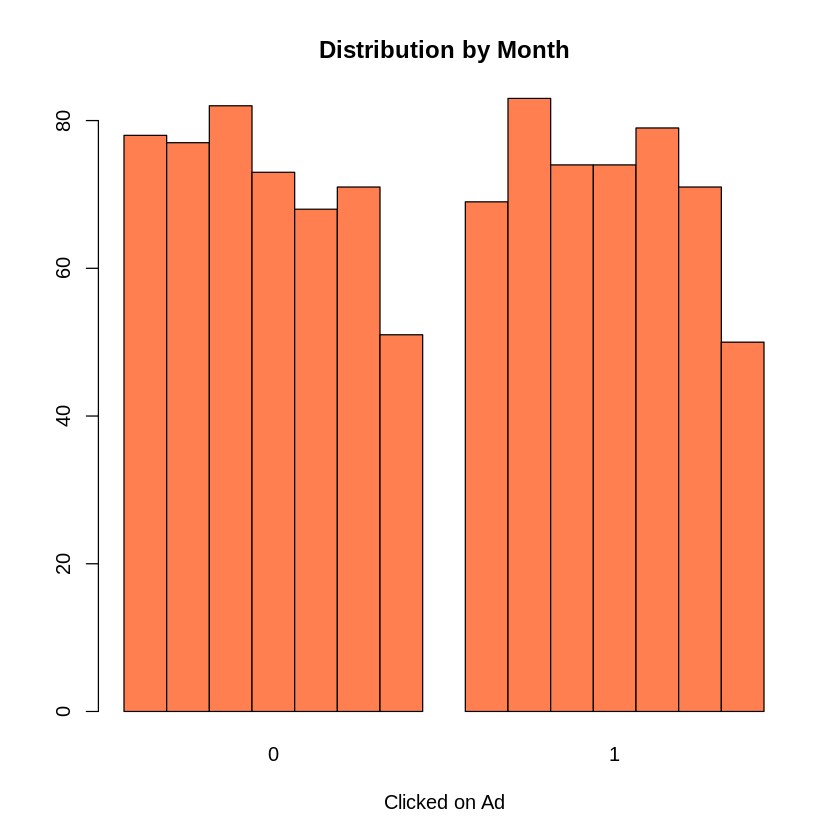

In [71]:
#Plot of month vs clicked on ad
month <- table(df$month, df$`Clicked on Ad`) 
barplot(month, main="Distribution by Month",
    xlab="Clicked on Ad",
    beside=TRUE, col='coral')

The plot for month column an clicked on ad vs not clicked on ad are somehow similar in terms of the frequency.

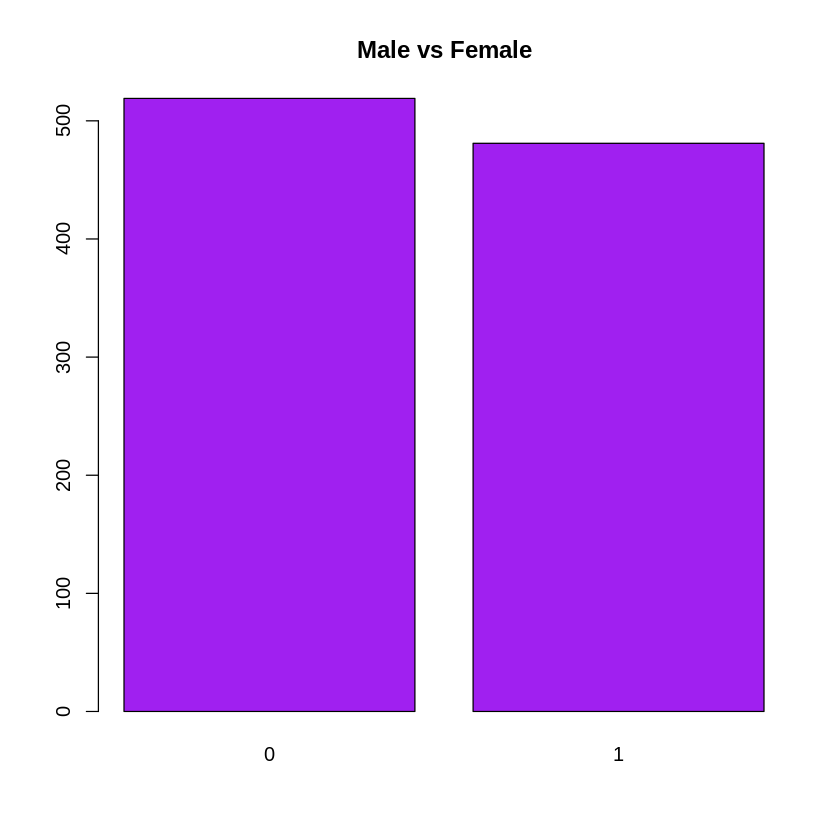

In [80]:
# Bar plot for male column.

sex <- df$Male
sex_f <- table(sex)
barplot(sex_f, col = "purple")
title("Male vs Female")

In [25]:
#Install GGally library
if(!require(devtools)) install.packages("devtools")
devtools::install_github("ggobi/ggally")
install.packages("GGally")

Loading required package: devtools

Loading required package: usethis




vctrs     (0.3.2 -> 0.3.4) [CRAN]
farver    (2.0.1 -> 2.0.3) [CRAN]
rprojroot (1.2   -> 1.3-2) [CRAN]
reshape   (NA    -> 0.8.8) [CRAN]


Installing 4 packages: vctrs, farver, rprojroot, reshape

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmp403ksd/remotes644a9fc19a/ggobi-ggally-17f6860/DESCRIPTION’
─  preparing ‘GGally’:
✔  checking DESCRIPTION meta-information
─  installing the package to process help pages
─  checking for LF line-endings in source and make files and shell scripts (7.7s)
─  checking for empty or unneeded directories
   Removed empty directory ‘GGally/notes’
   Removed empty directory ‘GGally/scripts’
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘GGally_2.0.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [29]:
library(GGally)# Used EDA visualization

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



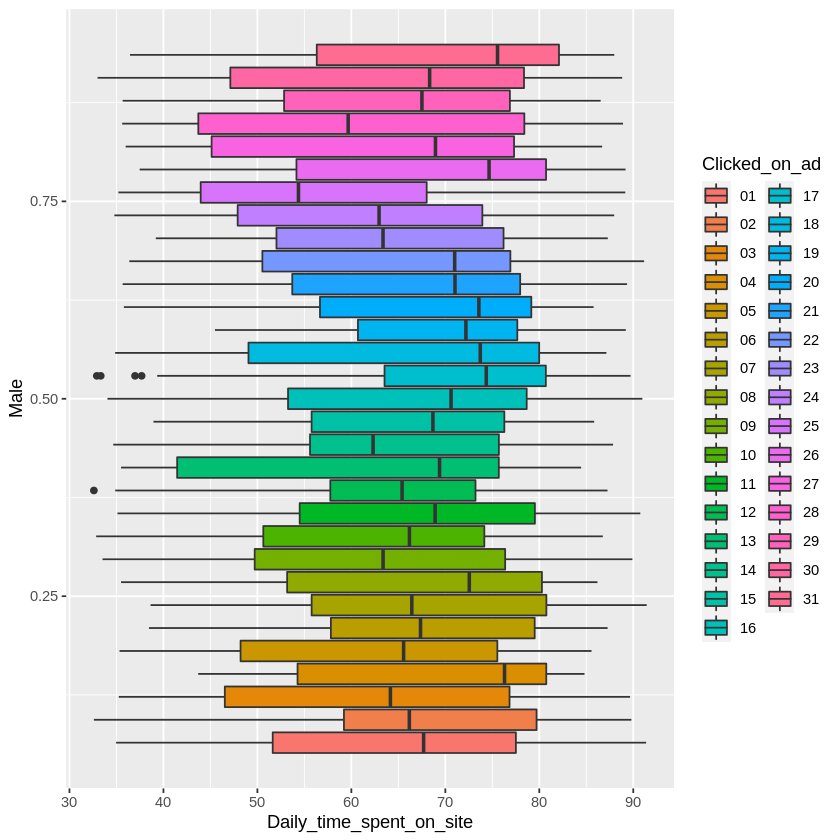

In [32]:
#Boxplot of male vs dailytime spent on site.
ggplot(data = df, mapping = aes(x = Male, y = Daily_time_spent_on_site, fill = Clicked_on_ad)) + 
  geom_boxplot() +
  coord_flip()



From the plot most of those who clicked on ads spend less time on the site. Of those who click on the ads.

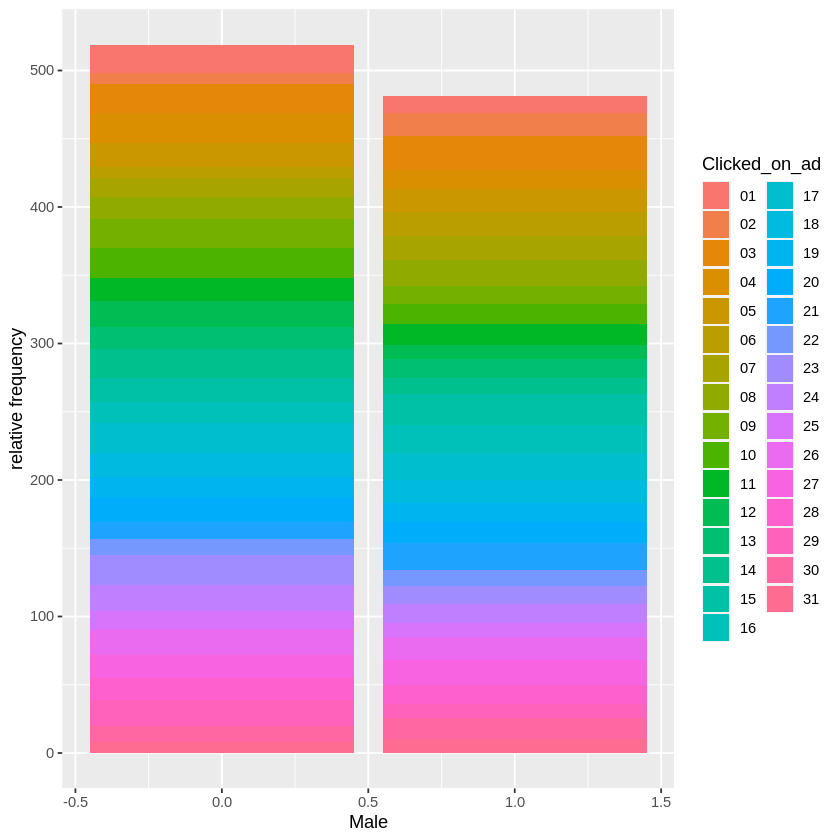

In [35]:
df %>% 
  ggplot() +
  aes(x = Male, Daily_internet_usage = ..count../nrow(df), fill = Clicked_on_ad) +
  geom_bar() +
  ylab("relative frequency")

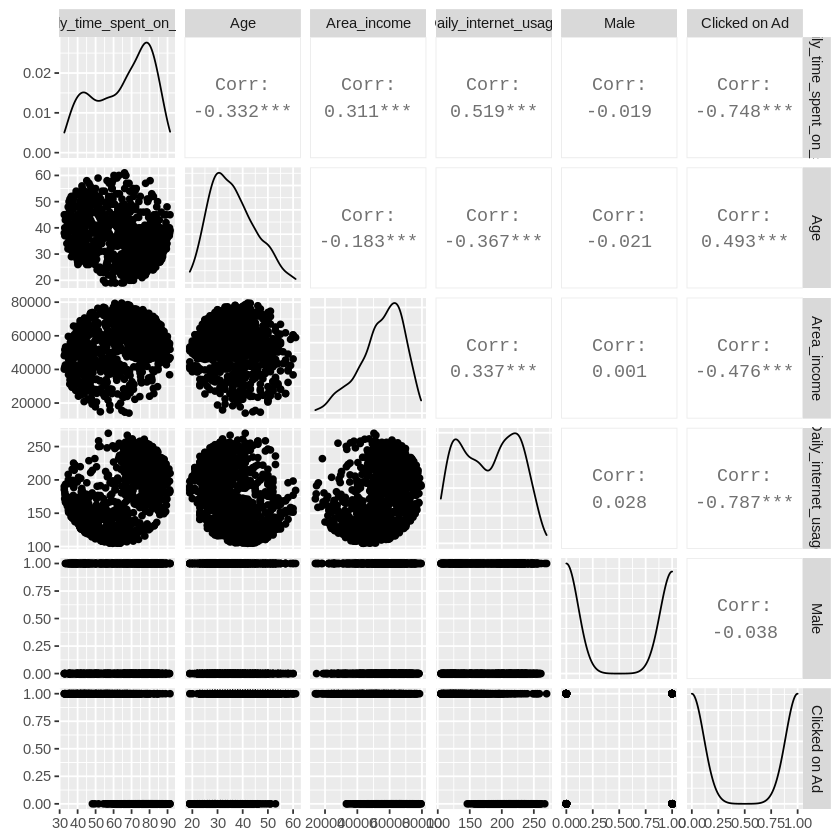

In [47]:
#Show various pair plots
ggpairs(num_cols)

This shows the relationships between various numerical columns,the correlation  between daiily internet usage and click on ad column is negatively correlated.

#5.Implementing the solution

##5.1Support vector Machine

In [58]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [96]:
df <- fread('http://bit.ly/IPAdvertisingData')
head(df)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [97]:
#Let me rename my variables for easier coding
names(df)[1] <- "Daily_time_spent_on_site"
names(df)[3] <- "Area_income"
names(df)[4] <- "Daily_internet_usage"
names(df)[5] <- "Ad_topic_line"
names(df)[10] <- "Clicked_on_ad"

In [98]:
head(df)

Daily_time_spent_on_site,Age,Area_income,Daily_internet_usage,Ad_topic_line,City,Male,Country,Timestamp,Clicked_on_ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


##5.2.Remove any variables we wont use for modelling

In [99]:
df <-subset(df,select = -`Ad_topic_line`)

In [100]:
df <-subset(df,select = -Timestamp)

In [101]:
df <-subset(df,select = -Country)

In [102]:
df <-subset(df,select = -City)

In [103]:
head(df)

Daily_time_spent_on_site,Age,Area_income,Daily_internet_usage,Male,Clicked_on_ad
<dbl>,<int>,<dbl>,<dbl>,<int>,<int>
68.95,35,61833.90,256.09,0,0
80.23,31,68441.85,193.77,1,0
69.47,26,59785.94,236.50,0,0
74.15,29,54806.18,245.89,1,0
68.37,35,73889.99,225.58,0,0
59.99,23,59761.56,226.74,1,0


In [105]:
#Normalize  numerical variables
normalize <- function(x) (
  return( ((x - min(x)) /(max(x)-min(x))) )
)

df$Daily_time_spent_on_site <- normalize(df$Daily_time_spent_on_site)
df$Daily_internet_usage <- normalize(df$Daily_internet_usage)
df$Area_income <- normalize(df$Area_income)
df$Age<- normalize(df$Age)

head(df)

Daily_time_spent_on_site,Age,Area_income,Daily_internet_usage,Male,Clicked_on_ad
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.6178820,0.3809524,0.7304725,0.9160310,0,0
0.8096209,0.2857143,0.8313752,0.5387456,1,0
0.6267211,0.1666667,0.6992003,0.7974331,0,0
0.7062723,0.2380952,0.6231599,0.8542802,1,0
0.6080231,0.3809524,0.9145678,0.7313234,0,0
0.4655788,0.0952381,0.6988280,0.7383460,1,0


In [107]:
#Split the data into train and test data.
intrain <- createDataPartition(y = df$Clicked_on_ad, p= 0.7, list = FALSE)
training <- df[intrain,]
testing <-df[-intrain,]


In [108]:
 #We check the dimensions of out training dataframe and testing dataframe
# ---
# 
dim(training); 
dim(testing);

[1] 700   6

[1] 300   6

In [109]:
# We then clean the data using the anyNA() method that checks for any null values.
# ---
#  
anyNA(df)

[1] FALSE

In [110]:
# Then check the summary of our data by using the summary() function
# ---
#  
summary(df)

 Daily_time_spent_on_site      Age          Area_income    
 Min.   :0.0000           Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.3189           1st Qu.:0.2381   1st Qu.:0.5044  
 Median :0.6054           Median :0.3810   Median :0.6568  
 Mean   :0.5507           Mean   :0.4050   Mean   :0.6261  
 3rd Qu.:0.7810           3rd Qu.:0.5476   3rd Qu.:0.7860  
 Max.   :1.0000           Max.   :1.0000   Max.   :1.0000  
 Daily_internet_usage      Male       Clicked_on_ad
 Min.   :0.0000       Min.   :0.000   Min.   :0.0  
 1st Qu.:0.2061       1st Qu.:0.000   1st Qu.:0.0  
 Median :0.4743       Median :0.000   Median :0.5  
 Mean   :0.4554       Mean   :0.481   Mean   :0.5  
 3rd Qu.:0.6902       3rd Qu.:1.000   3rd Qu.:1.0  
 Max.   :1.0000       Max.   :1.000   Max.   :1.0  

In [111]:
#Making the clicked on ad column a factor since it is the target variable.
training[["Clicked_on_ad"]] = factor(training[["Clicked_on_ad"]])

In [112]:
install.packages('kernlab')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [113]:
library(kernlab)

In [114]:
#Cross validation
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

svm_Linear <- train(Clicked_on_ad ~., data = training, method = "svmLinear",
trControl=trctrl,
preProcess = c("center", "scale"),
tuneLength = 10)


In [115]:
svm_Linear # Lets see the results

Support Vector Machines with Linear Kernel 

700 samples
  5 predictor
  2 classes: '0', '1' 

Pre-processing: centered (5), scaled (5) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 630, 630, 630, 630, 630, 630, ... 
Resampling results:

  Accuracy   Kappa    
  0.9719048  0.9438095

Tuning parameter 'C' was held constant at a value of 1

In [116]:
# Use the predict() method for predicting results. 
# We pass 2 arguements, our trained model and our testing data frame.
# ---
# 
test_pred <- predict(svm_Linear, newdata = testing)
test_pred

[1] 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1
 [38] 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1
 [75] 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
[112] 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1
[149] 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0
[186] 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1
[223] 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1
[260] 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0
[297] 0 0 1 1
Levels: 0 1

In [117]:
# Now checking for our accuracy of our model by using a confusion matrix 
# ---
# 
confusionMatrix(table(test_pred, testing$Clicked_on_ad))

Confusion Matrix and Statistics

         
test_pred   0   1
        0 143   4
        1   7 146
                                          
               Accuracy : 0.9633          
                 95% CI : (0.9353, 0.9816)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9267          
                                          
 Mcnemar's Test P-Value : 0.5465          
                                          
            Sensitivity : 0.9533          
            Specificity : 0.9733          
         Pos Pred Value : 0.9728          
         Neg Pred Value : 0.9542          
             Prevalence : 0.5000          
         Detection Rate : 0.4767          
   Detection Prevalence : 0.4900          
      Balanced Accuracy : 0.9633          
                                          
       'Positive' Class : 0               
                                          

We have a very high accuacy of 0.963.

#6.Challenging the solution

##6.1.Decision trees

Decision trees are versatile Machine Learning algorithm that can perform both classification and regression tasks. They are very powerful algorithms, capable of fitting complex datasets. 
A decision tree is a graph to represent choices and their results in form of a tree. The nodes in the graph represent an event or choice and the edges of the graph represent the decision rules or conditions. It is mostly used in Machine Learning and Data Mining applications using R.

In [120]:
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [121]:
library(rpart.plot)

In [122]:
library(mlbench)

In [123]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




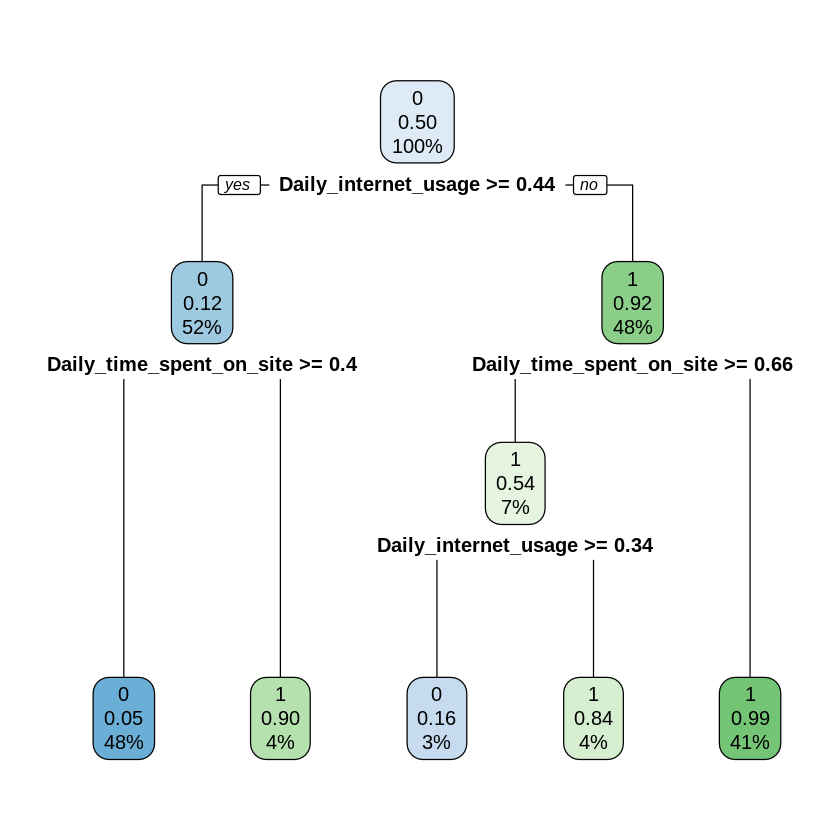

In [124]:
#Plot the decision tree
m <- rpart(Clicked_on_ad ~ ., data = df,
           method = "class")

rpart.plot(m)

In [128]:
#Lets see the confusion matrix
p <- predict(m, df, type = "class")
table(p, df$Clicked_on_ad)

   
p     0   1
  0 485  28
  1  15 472

In [130]:
install.packages("ranger")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’




In [131]:
library(ranger)

##6.2.Random forest classifier

In [157]:
#Train the model
set.seed(12)
library(ranger)
library(caret)
model <- train(Clicked_on_ad ~ .,
               data = training,
               method = "ranger") 
model

Random Forest 

700 samples
  5 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 700, 700, 700, 700, 700, 700, ... 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
  2     gini        0.9622022  0.9242596
  2     extratrees  0.9661932  0.9322525
  3     gini        0.9588660  0.9175747
  3     extratrees  0.9657236  0.9313041
  5     gini        0.9475550  0.8948761
  5     extratrees  0.9624740  0.9247998

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 2, splitrule = extratrees
 and min.node.size = 1.

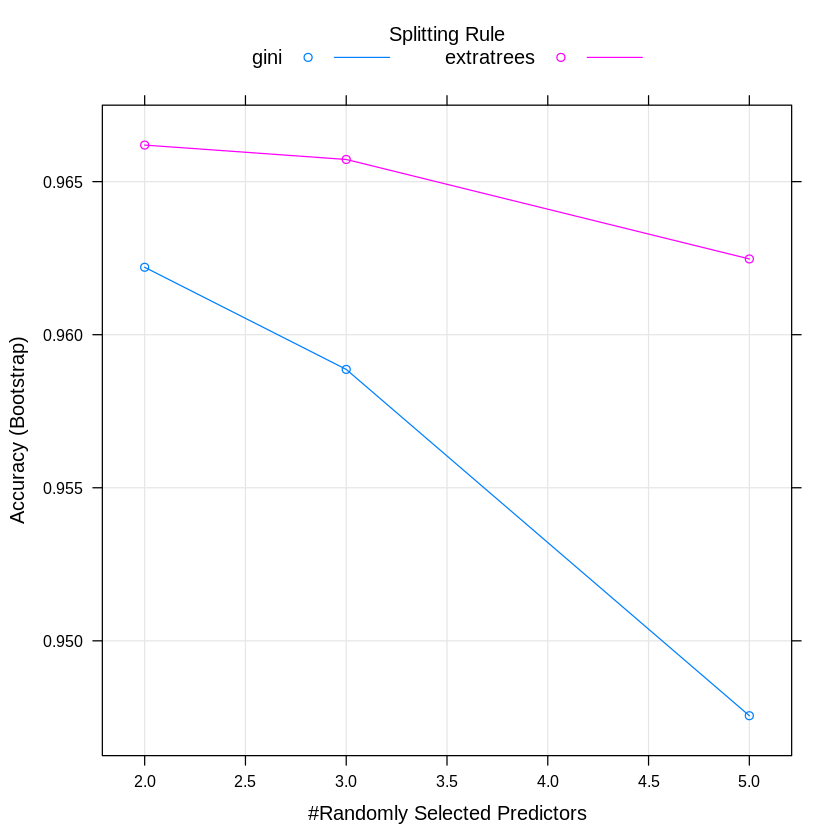

In [158]:
plot(model) 

The main hyperparameters is mtry, i.e. the number of randomly selected variables used at each split. 2 variables produce random models, while 100s of variables tend to be less random, but risk over-fitting. caret automate the tuning of the hyperparameter using a grid search, which can be parametrised by setting tuneLength (that sets the number of hyperparameter values to test) or directly defining the tuneGrid (the hyperparameter values), which requires knowledge of the model.

In [160]:
# Training the model
model <- train(Clicked_on_ad ~ .,
               data = training,
               method = "ranger",
               tuneLength = 4)

In [161]:
set.seed(42)
myGrid <- expand.grid(mtry = c(2,5,6),
                     splitrule = c("gini", "extratrees"),
                     min.node.size = 4)

In [162]:
#Cross validation
model <- train(Clicked_on_ad ~ .,
               data = training,
               method = "ranger", 
               tuneGrid = myGrid,
               trControl = trainControl(method = "cv",
                                       number = 5,
                                       verboseIter = FALSE))



Warning message:
“model fit failed for Fold1: mtry=6, splitrule=gini, min.node.size=4 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
”
Warning message:
“model fit failed for Fold1: mtry=6, splitrule=extratrees, min.node.size=4 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
”
Warning message:
“model fit failed for Fold2: mtry=6, splitrule=gini, min.node.size=4 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
”
Warning message:
“model fit failed for Fold2: mtry=6, splitrule=extratrees, min.node.size=4 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
”
Warning message:
“model fit failed for Fold3: mtry=6, splitrule=gini, min.node.size=4 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or intern

In [163]:
model

Random Forest 

700 samples
  5 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 560, 560, 560, 560, 560 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
  2     gini        0.9600000  0.9200000
  2     extratrees  0.9657143  0.9314286
  5     gini        0.9485714  0.8971429
  5     extratrees  0.9657143  0.9314286
  6     gini              NaN        NaN
  6     extratrees        NaN        NaN

Tuning parameter 'min.node.size' was held constant at a value of 4
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 2, splitrule = extratrees
 and min.node.size = 4.

From the results the model has done very well.

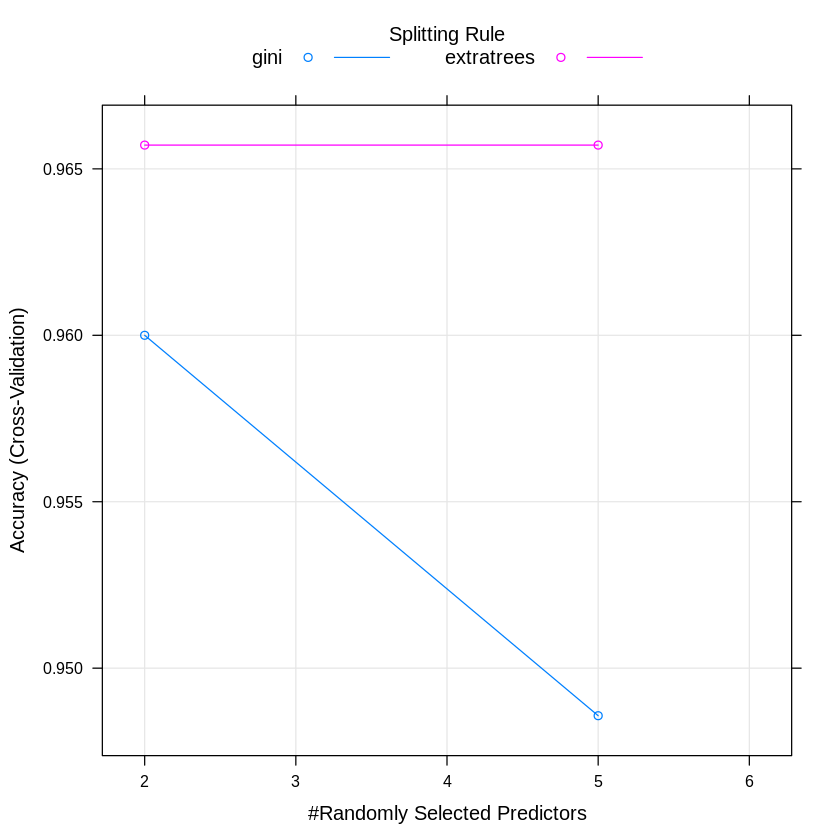

In [164]:
# Plotting the model
plot(model)

Cross validation allows us to alternate between training and testing to maximize error estimation.The gini index  splitting rule increases initially at first then flattens afterwards showing minimization of impurity.

#8.Conclusion

1.Most people involved in this study were between the age of 30-40 yrs from the univariate plots of the age column which suggests that young people love going online most likely to access information.These people in the agegroup 30-40 should be actively targeted when trying to advertise inorder for a business to be successful.Since we have seen there is a strong positive correlation between the time spent on the Internet and the Internet usage.So it is clear that users who spend more time on the internet also spend time on the site.

2.The average age of a person in this study is 36 years old, the youngest user is 19 and the oldest is 61 years old and therefore we conclude that the site is targetting adult users.Mid aged level are more inclined towards clicking on an ad than others.

3.More females were involved in this study than males ,therefore the kenyan entrepreneur should target more females and younger people.

4.From the solutions above, the svm model has the highest has accuracy : 0.9633.
It has surpassed my metric of success of 90% accuracy.

#9.Follow up questions

Did we have the right data? Yes we did

Did we have the right question? Yes we did

Do we need to do anything else to answer the question? Yes we would need to try other algorithms like Naive bayes algorithm and see how it performs.